In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# 避免特定的錯誤提示
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

train = pd.read_csv('train.csv')

### 將時間資訊整理成日月年
> https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat#EDA

In [5]:
#Since only last two digits of year are provided, this is the correct way of getting the year.
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train['release_date']) 
train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

#### 繪製年份與數量的趨勢

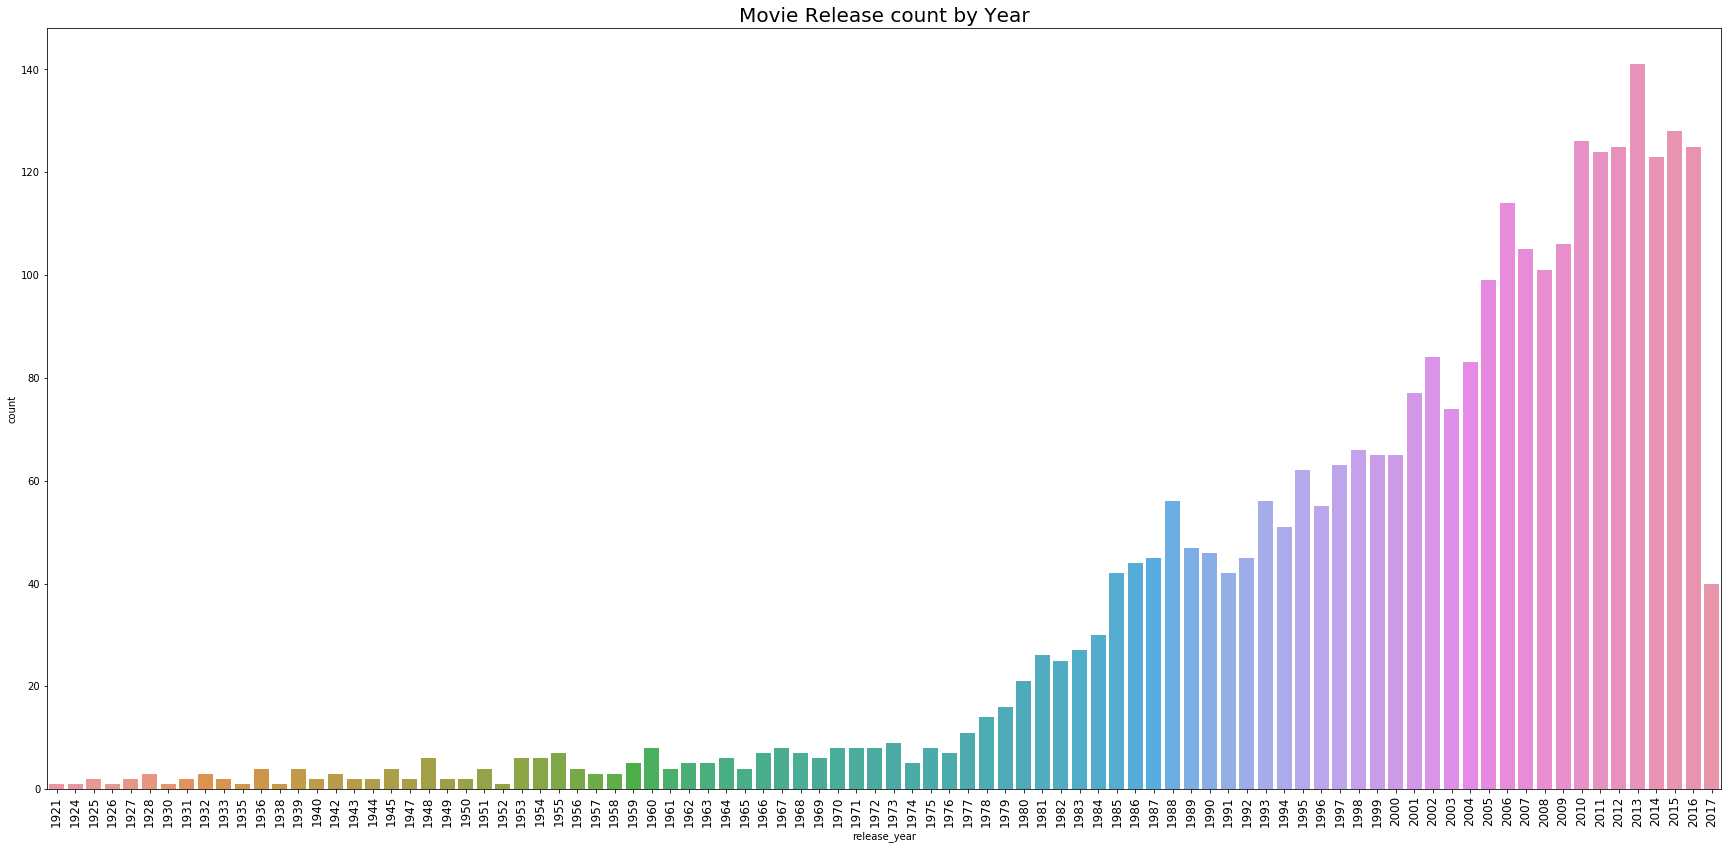

In [6]:
plt.figure(figsize=(30,14))
sns.countplot(train['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

#### 繪製月份與數量的趨勢

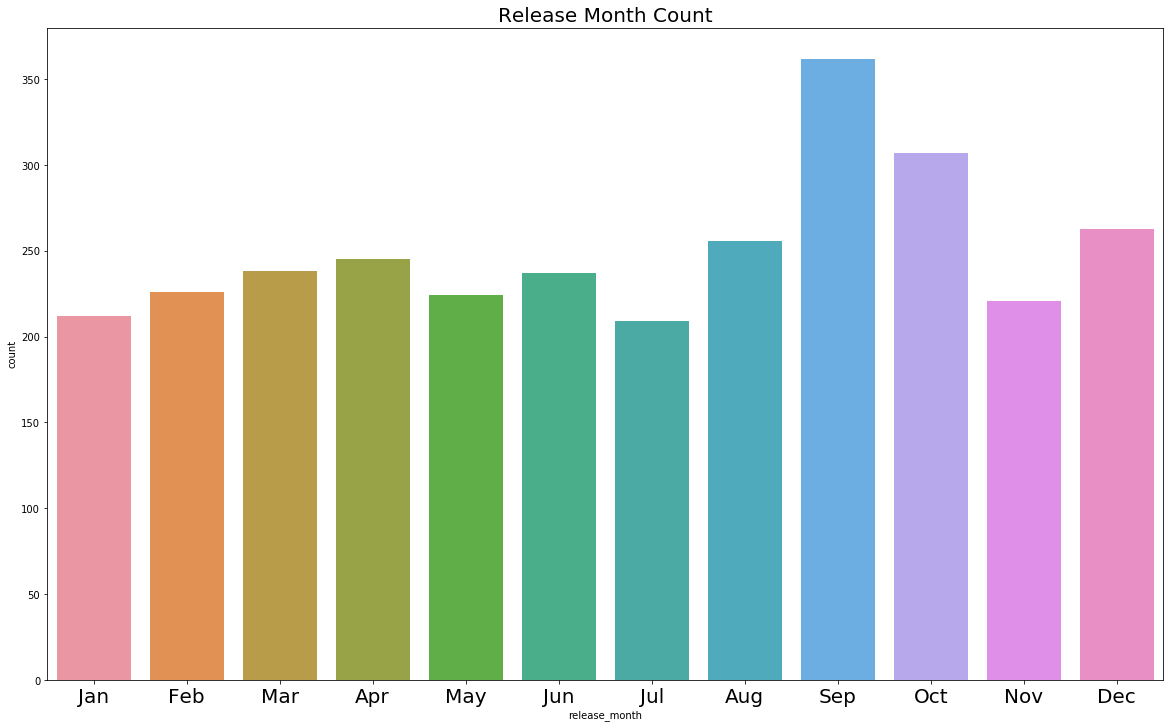

In [7]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_month'].sort_values())
plt.title("Release Month Count",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

#### 繪製日期與數量的趨勢

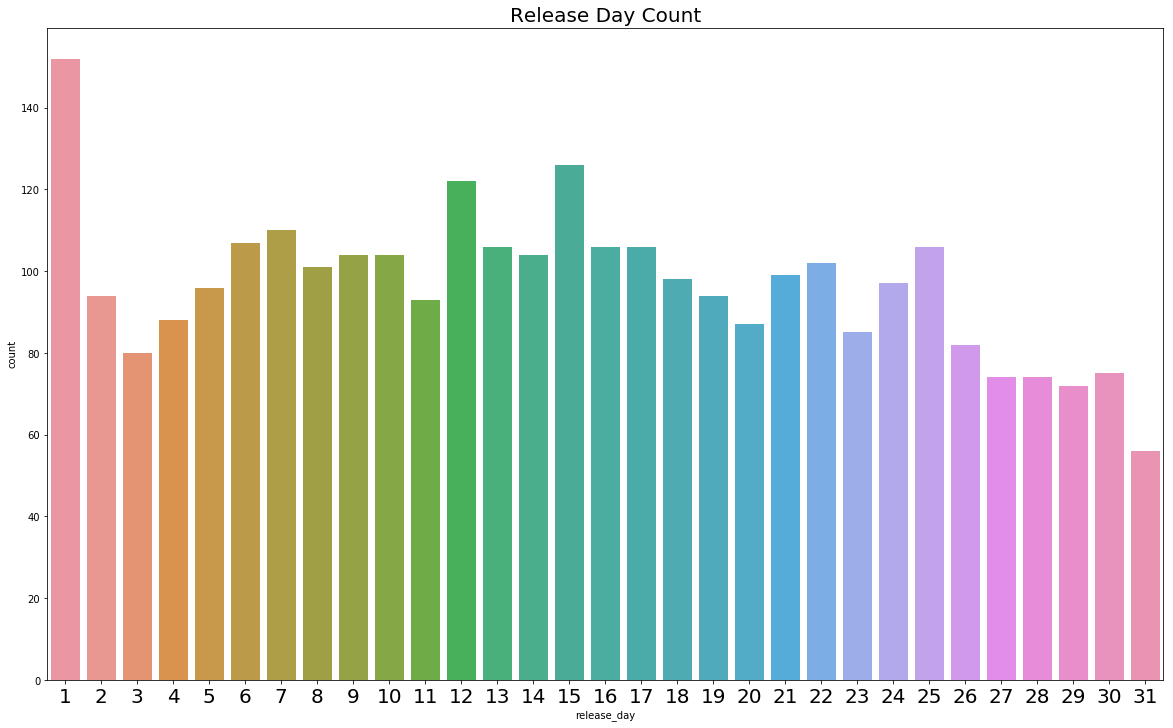

In [8]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_day'].sort_values())
plt.title("Release Day Count",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

#### 繪製星期幾與數量的趨勢

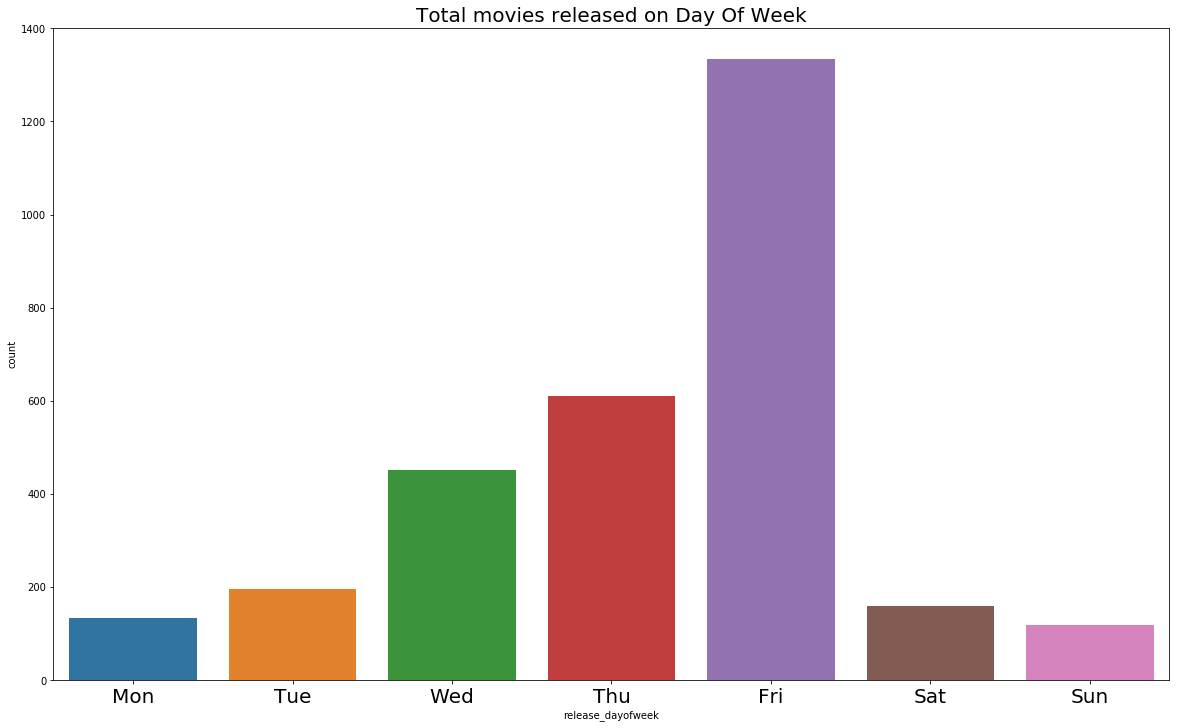

In [9]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_dayofweek'].sort_values())
plt.title("Total movies released on Day Of Week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

#### 繪製季度與數量的趨勢

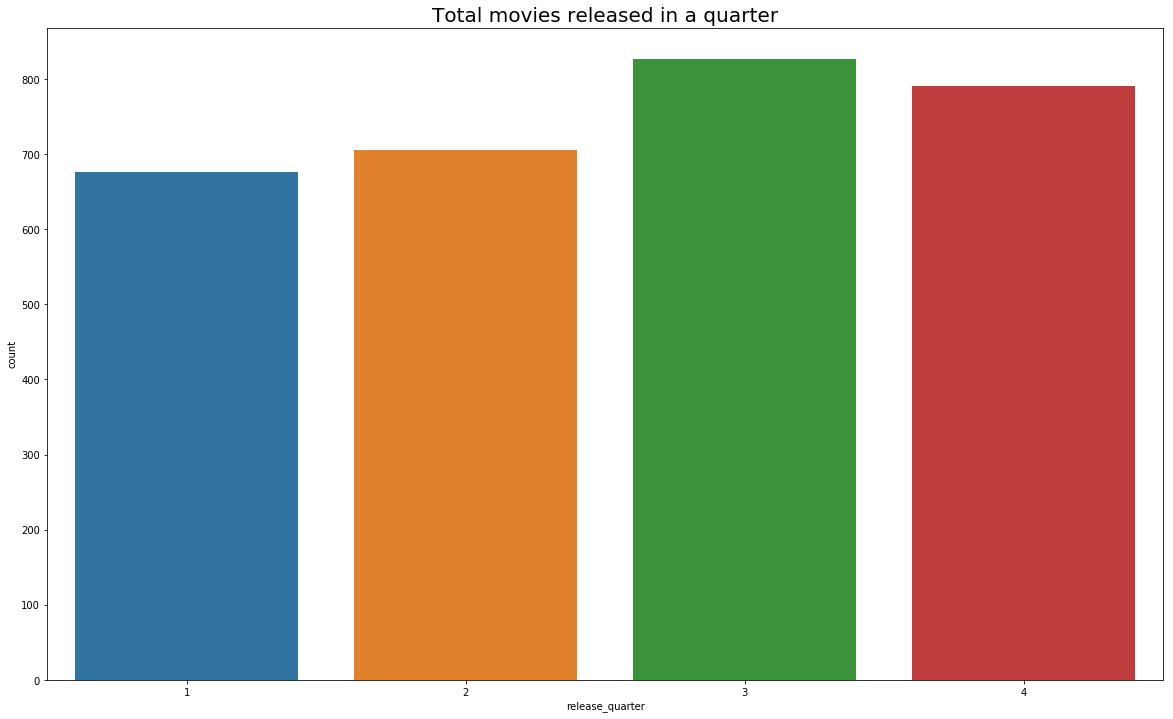

In [10]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_quarter'].sort_values())
plt.title("Total movies released in a quarter",fontsize=20)
plt.show()

#### 繪製年份與收入的走勢

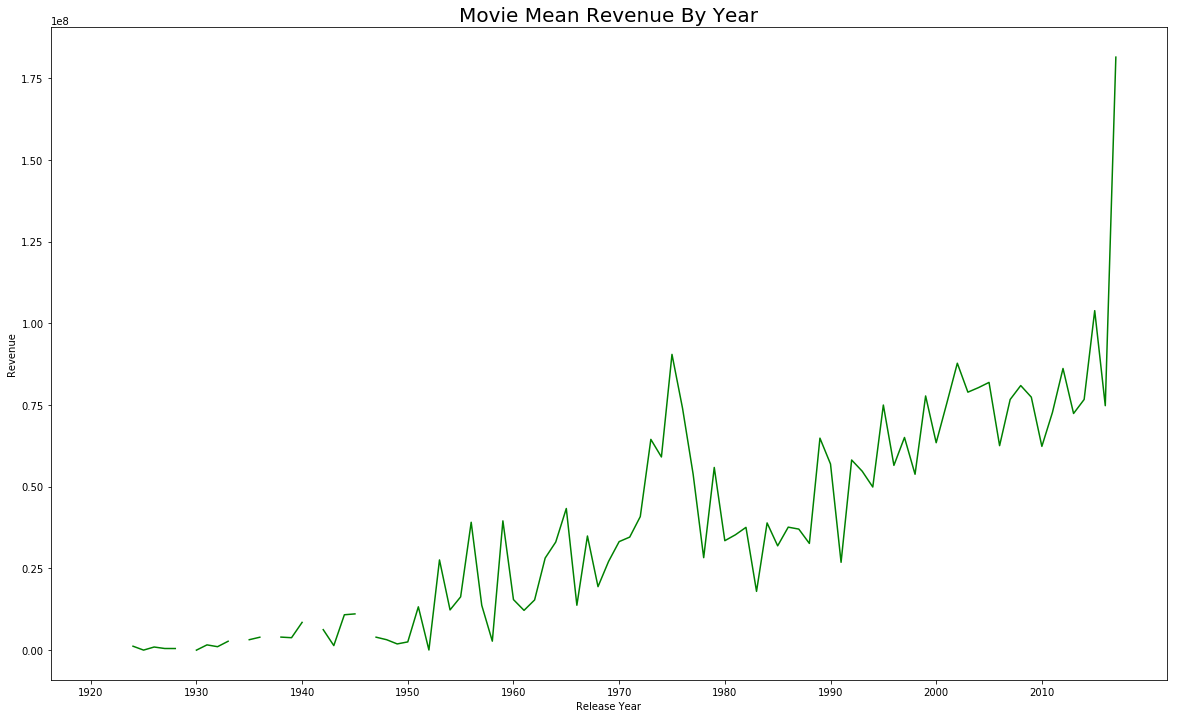

In [17]:
train['meanRevenueByYear'] = train.groupby("release_year")["revenue"].aggregate('mean')
plt.figure(figsize=(20,12))
plt.plot(train['meanRevenueByYear'], color="g")
plt.xticks(np.arange(1920,2018,10))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year",fontsize=20)
plt.show()

#### 繪製月份與收入的走勢

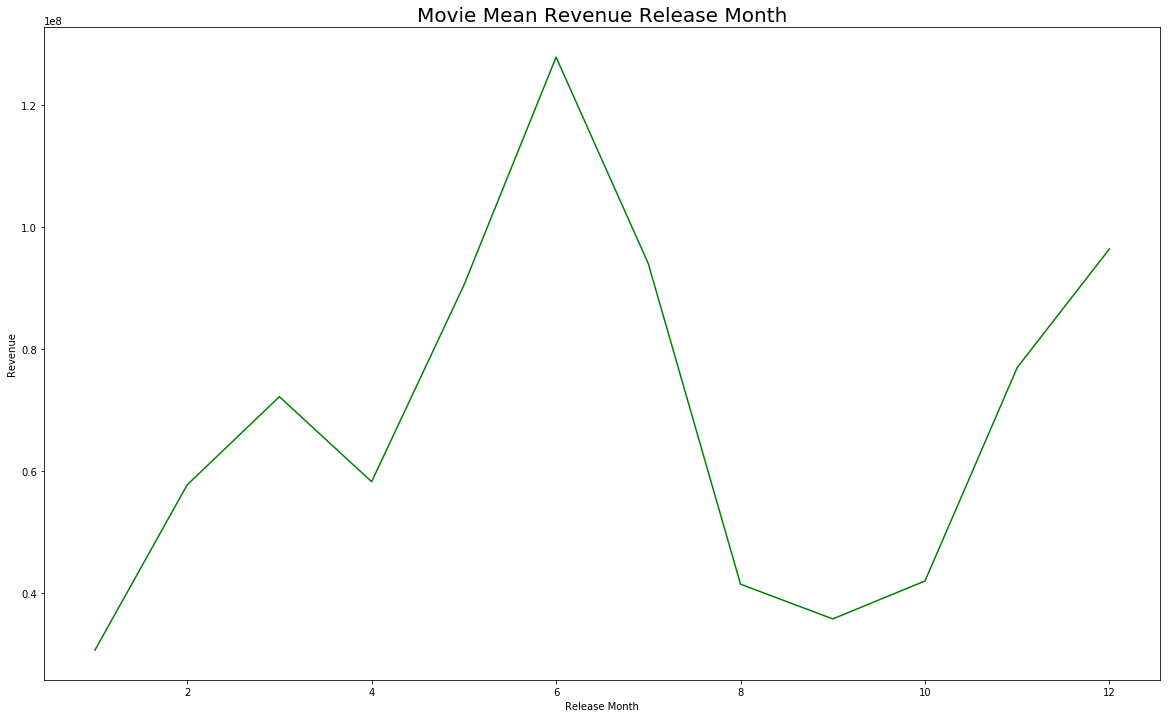

In [6]:
train['meanRevenueByMonth'] = train.groupby("release_month")["revenue"].aggregate('mean')
plt.figure(figsize=(20,12))
plt.plot(train['meanRevenueByMonth'], color="g")
plt.xlabel("Release Month")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue Release Month",fontsize=20)
plt.show()

### 語言與影片數量

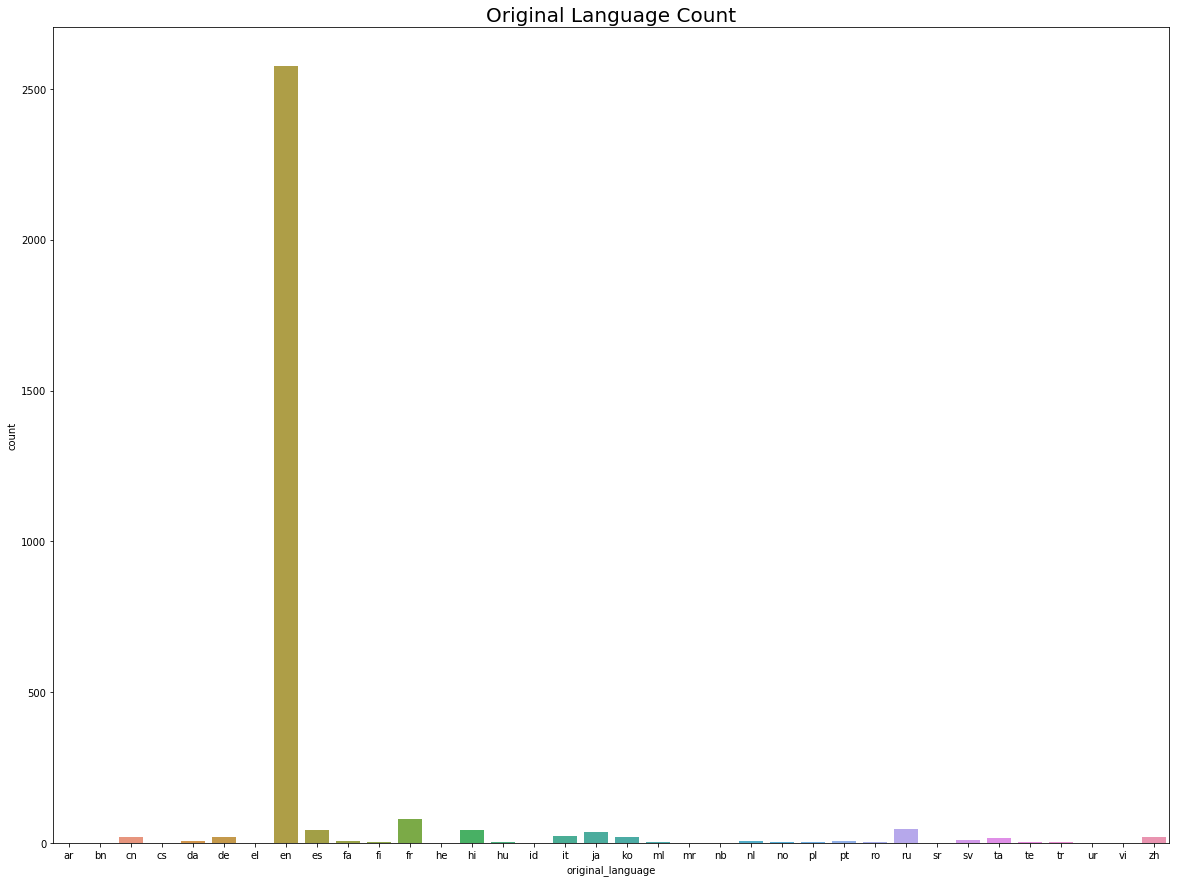

In [7]:
plt.figure(figsize=(20,15))
sns.countplot(train['original_language'].sort_values())
plt.title("Original Language Count",fontsize=20)
plt.show()

### 特徵間的關係

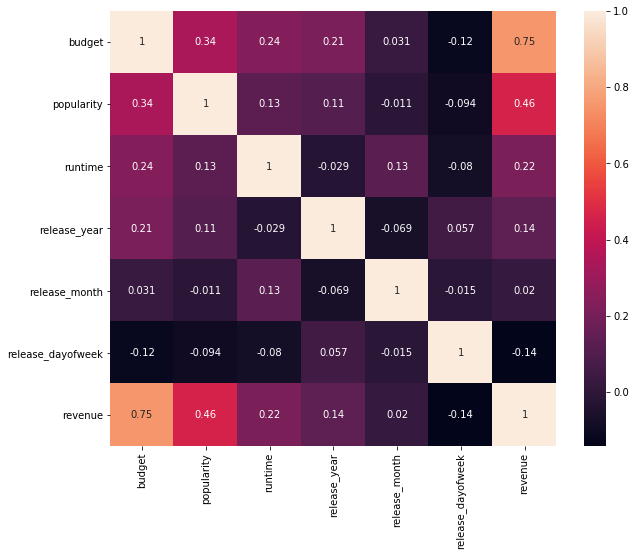

In [9]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train[['budget','popularity','runtime','release_year','release_month','release_dayofweek','revenue']].corr(), annot=True)
plt.show()